In [246]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

In [247]:
from imblearn.over_sampling import SMOTE

In [248]:
df  = pd.read_excel('矿区预测资料/准确矿点数据.xlsx')

In [249]:
df.head()

,线号,点号,是否有矿,X,Y,高度,氡浓度(bq/m3),磁法(nT),铀含量(ug/g),钍含量(ug/g),...,Zur,ZTh/U,ZFs,Zρ,F1,F2,F3,F4,F5,F
0,0,0,0.0,417818.0,2846343.0,768.0,580.9,1.9,3.67,12.13,...,-0.46680,-0.07696,0.45684,-0.07007,-0.65330,-0.33267,0.11785,0.53213,0.07625,-0.20
1,0,2,0.0,417821.0,2846339.0,760.0,2242.2,-9.5,4.39,12.94,...,-0.27110,-0.27849,0.69004,-0.06503,-0.55699,-0.08849,-0.01851,0.74613,0.00810,-0.10
2,0,4,0.0,417837.0,2846328.0,757.0,3141.3,-5.5,4.16,12.32,...,-0.25122,-0.27064,0.31692,-0.06392,-0.66909,-0.08223,0.03315,0.34624,-0.04219,-0.19
3,0,6,0.0,417859.0,2846320.0,760.0,4366.0,5.6,4.01,8.99,...,-0.48209,-0.67625,0.13036,-0.06077,-1.15901,0.10827,0.08316,0.10236,-0.08386,-0.32
4,0,8,0.0,417881.0,2846311.0,745.0,5402.0,-16.3,6.68,23.30,...,1.46727,0.02610,0.55012,-0.06439,2.12582,0.40405,-0.29973,0.71604,0.09140,0.85


In [250]:
df.shape

(561, 30)

In [251]:
df.columns

Index(['线号', '点号   ', '是否有矿', 'X', 'Y', '高度', '氡浓度(bq/m3)', '磁法(nT)',
       '铀含量(ug/g)', '钍含量(ug/g)', '钾含量(%)', '总放射性含量(Ur)', '钍/铀', '极化率', '视电阻率',
       'ZRn', 'Z△t', 'ZU', 'ZTh', 'ZK', 'Zur', 'ZTh/U', 'ZFs', 'Zρ', 'F1',
       'F2', 'F3', 'F4', 'F5', 'F'],
      dtype='object')

In [252]:
df.是否有矿.value_counts()

0.0    142
1.0     88
Name: 是否有矿, dtype: int64

In [253]:
df['是否有矿'].isna().sum()

331

In [254]:
factor =  ['高度', '氡浓度(bq/m3)', '磁法(nT)',
       '铀含量(ug/g)', '钍含量(ug/g)', '钾含量(%)', '总放射性含量(Ur)', '钍/铀', '极化率', '视电阻率',
       'ZRn', 'Z△t', 'ZU', 'ZTh', 'ZK', 'Zur', 'ZTh/U', 'ZFs', 'Zρ', 'F1',
       'F2', 'F3', 'F4', 'F5', 'F']

label = ['是否有矿']

In [255]:
df['无标签数据'] = df['是否有矿'].isna()
df['是否有矿'] = df['是否有矿'].fillna(0)
df_example = df[~df['是否有矿'].isna()]
X, y = df_example[factor].values, df_example[label].values

In [256]:
from sklearn.preprocessing import StandardScaler

# 创建 StandardScaler 对象
scaler = StandardScaler()

# 假设 X 是你的数据集，形状为 (n_samples, n_features)
# 对数据集进行标准化处理
X_standardized = scaler.fit_transform(X)

# 标准化后的数据集可以用于后续的模型训练和预测


In [257]:
df_example_other = df[df['是否有矿'].isna()]
X_other = df_example_other[factor[:-6]].values

In [258]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 生成新标签

In [259]:
# 使用 SMOTE 进行样本平衡
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

In [260]:
X_train_resampled.shape

In [261]:
# 重采样支持向量机模型
smote_svm = SVC(kernel='rbf',degree=3,C=10, probability=True)
smote_svm.fit(X_train_resampled, y_train_resampled)

0.0    424
1.0    137
Name: 是否有矿_新, dtype: int64

In [262]:
y_pred_svm = smote_svm.predict_proba(X_other)[:, 1]

In [263]:
(y_pred_svm > 0.456).sum()/len(y_pred_svm), (y_pred_svm > 0.457).sum()

/Users/ben/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ben/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


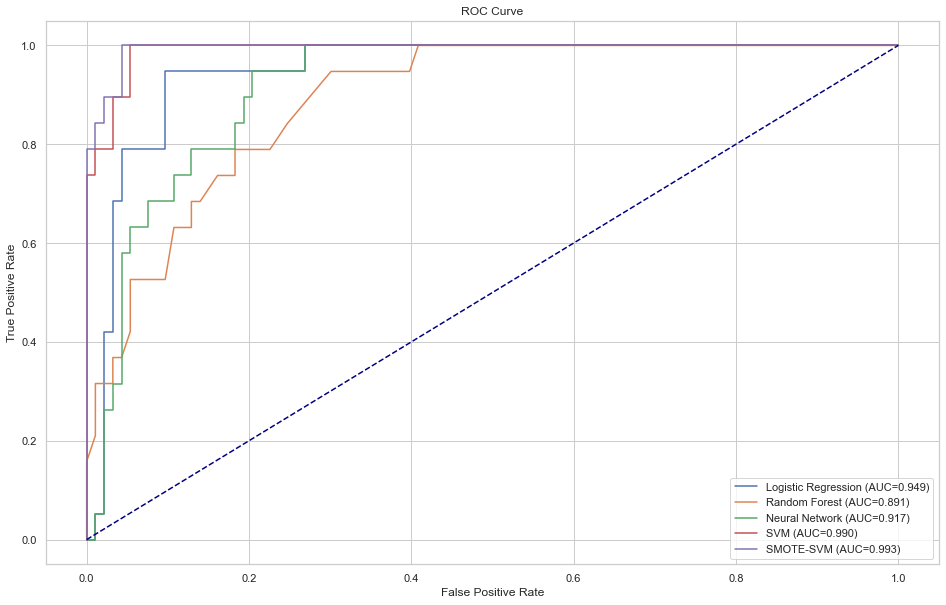

In [264]:
df['是否有矿_补充'] = df['是否有矿']
df.loc[df['是否有矿'].isna(), '是否有矿_补充'] = (y_pred_svm > 0.456) * 1

In [265]:
df['是否有矿_补充'].value_counts()

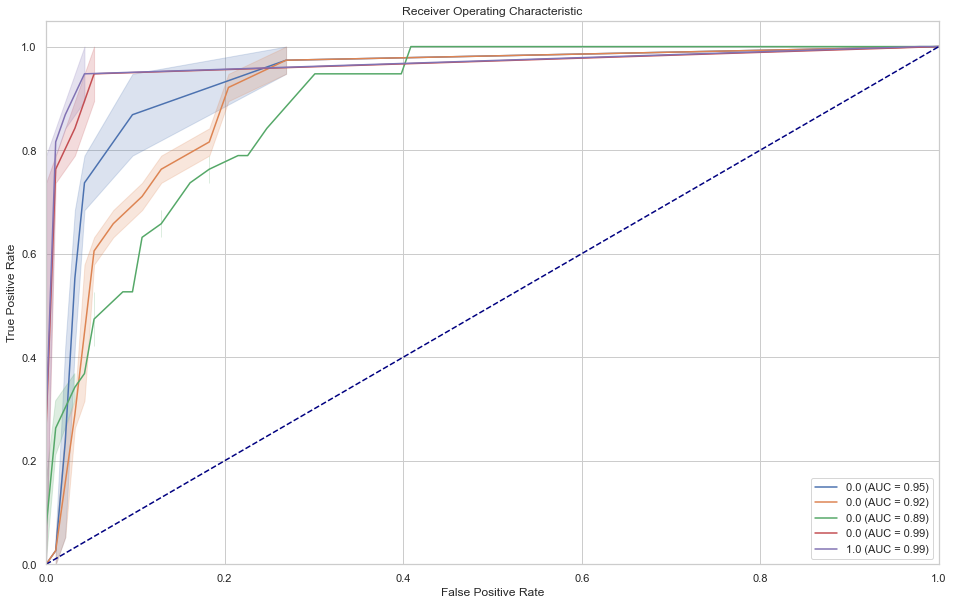

In [266]:
factor =  ['X', 'Y', '高度', '氡浓度(bq/m3)', '磁法(nT)',
       '铀含量(ug/g)', '钍含量(ug/g)', '钾含量(%)', '总放射性含量(Ur)', '钍/铀', '极化率', '视电阻率',
       'ZRn', 'Z△t', 'ZU', 'ZTh', 'ZK', 'Zur', 'ZTh/U', 'ZFs', 'Zρ']

label = ['是否有矿_补充']

In [267]:
X, y = df[factor[:-6]].values, df[label].values

In [268]:
X.shape

In [269]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [270]:
# 使用 SMOTE 进行样本平衡
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.883929,0.625000,0.789474,0.697674,0.949066
1,Random Forest,0.866071,0.750000,0.315789,0.444444,0.891058
2,Neural Network,0.892857,0.733333,0.578947,0.647059,0.917940
3,SVM,0.946429,0.809524,0.894737,0.850000,0.990379
4,SMOTE-SVM,0.946429,0.809524,0.894737,0.850000,0.993775


In [270]:

# 多元线性回归模型
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_score = linear_reg.score(X_test, y_test)

# 随机森林模型
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_score = random_forest.score(X_test, y_test)

# 神经网络模型
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp_score = mlp.score(X_test, y_test)

# 支持向量机模型
svm = SVC(kernel='rbf', C=100, probability=True)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)

# 重采样支持向量机模型
smote_svm = SVC(kernel='linear', probability=True)
smote_svm.fit(X, y)
smote_svm_score = smote_svm.score(X_test, y_test)

# ROC 曲线对比
plt.figure(figsize=(10, 6))

# 多元线性回归 ROC 曲线
y_pred_linear_reg = linear_reg.predict(X_test)
fpr_linear_reg, tpr_linear_reg, _ = roc_curve(y_test, y_pred_linear_reg)
plt.plot(fpr_linear_reg, tpr_linear_reg, label='Linear Regression')

# 随机森林 ROC 曲线
y_pred_random_forest = random_forest.predict_proba(X_test)[:, 1]
fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, y_pred_random_forest)
plt.plot(fpr_random_forest, tpr_random_forest, label='Random Forest')

# 神经网络 ROC 曲线
y_pred_mlp = mlp.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)
plt.plot(fpr_mlp, tpr_mlp, label='Neural Network')

# 支持向量机 ROC 曲线
y_pred_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
plt.plot(fpr_svm, tpr_svm, label='SVM')


# 支持向量机 ROC 曲线
y_pred_svm = smote_svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
plt.plot(fpr_svm, tpr_svm, label='SMOTE-SVM')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [270]:
mlp_score